In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import umap
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Prep data

In [2]:
# Prep training data
training_data = pd.read_excel("drug_data_trajectories.xlsx",sheet_name='train')

y_train = training_data['Drug Name']
X_train = training_data.drop(columns=['Drug Name'])

training_data

,Drug Name,Concentration (mM),T25,T26,T27,T28,T29,T30,T31,T32,T33,T34,T35,T36,T37,T38,T39,T40
0,Fentanyl,0,100.000000,92.825365,100.461579,92.469817,86.496792,80.661569,64.268772,50.350061,37.267764,27.521156,21.363218,18.085617,15.440689,14.554591,13.614447,12.971793
1,Fentanyl,2,114.551294,108.226430,109.563694,101.546899,92.327980,85.967309,72.666348,55.804172,24.025181,10.256519,7.030723,5.445027,4.459984,4.102041,3.842967,3.854784
2,Fentanyl,4,100.925289,98.476665,94.333656,88.037290,79.007199,70.903336,60.163533,50.582466,28.928994,10.584410,5.436675,3.956702,3.221069,2.881819,2.572369,2.523481
3,Fentanyl,6,88.579522,87.431246,82.035154,75.451290,69.876852,63.826349,53.170001,45.394162,28.973436,10.311773,4.511629,3.121284,2.498427,2.223310,1.948349,1.963360
4,Fentanyl,8,97.798757,94.478575,87.565561,80.106299,72.833861,67.349338,55.847019,46.953359,30.619634,12.971793,6.086019,4.463409,3.569987,3.169567,2.818383,2.818383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Isoniazid,2,111.943788,109.816264,106.414302,107.151931,106.169556,104.712855,102.643945,100.076782,98.552278,98.250175,98.250175,97.798757,97.349412,97.349412,97.498964,97.573826
98,Isoniazid,4,103.593697,98.099471,94.841846,94.188960,93.039350,90.991327,89.536477,86.629671,85.638030,85.506671,86.099375,86.962764,87.700082,88.988387,89.742879,90.642804
99,Isoniazid,6,119.398810,114.815362,111.002647,109.732010,108.226430,106.006704,105.357794,104.873718,104.873718,105.844103,106.823466,107.398941,108.392691,109.732010,111.173173,112.287997
100,Isoniazid,8,120.688716,116.591440,115.877736,113.937495,113.937495,112.892910,111.857901,110.747348,110.492636,110.407862,110.662378,111.087877,111.515011,111.943788,112.201845,112.633263


In [3]:
# Prep testing data
test_data = pd.read_excel("drug_data_trajectories.xlsx",sheet_name='test')

y_test = test_data['Drug Name']
X_test = test_data.drop(columns=['Drug Name'])

test_data

,Drug Name,Concentration (mM),T25,T26,T27,T28,T29,T30,T31,T32,T33,T34,T35,T36,T37,T38,T39,T40
0,Fentanyl,0,100.000000,99.007175,125.699437,119.398810,108.226430,97.873849,84.983250,69.449107,51.880004,39.627803,31.405087,25.215447,21.021643,18.721185,16.878480,16.355607
1,Fentanyl,2,112.201845,105.357794,114.200148,111.343961,101.780989,93.110788,81.096106,69.662651,40.457589,14.498843,8.407496,6.358188,5.227973,4.897788,4.525501,4.567375
2,Fentanyl,4,115.168400,109.732010,130.617089,121.711982,114.287833,106.332657,92.044957,82.921408,66.221650,29.648314,13.583134,9.682779,7.750564,7.014553,6.476395,6.481368
3,Fentanyl,6,87.632796,84.268772,91.341190,84.010454,77.149539,69.716140,57.765251,49.279542,37.011214,16.943378,5.662393,3.591975,2.835742,2.479324,2.250781,2.268123
4,Fentanyl,8,104.391867,97.648745,104.632516,95.572585,86.696188,77.983011,66.018654,58.299747,47.716290,24.154608,8.763280,5.865882,4.549881,4.120975,3.813584,3.790240
5,Fentanyl,10,84.918048,93.756201,103.752842,96.530969,87.163234,78.162780,65.313055,55.804172,35.291220,12.618275,7.550922,6.227781,5.710402,5.432503,5.370318,5.486979
6,Ibuprofen Sodium,0,100.000000,88.443652,82.035154,71.669328,56.798038,40.863290,33.087707,27.268840,23.334581,20.307977,18.169097,16.368165,15.511960,14.223288,13.233255,12.236766
7,Ibuprofen Sodium,2,95.792903,82.730694,75.509223,66.783114,57.147864,44.908995,37.210599,30.432199,25.684237,22.908677,20.276827,18.183047,16.634127,15.691580,14.599344,14.038908
8,Ibuprofen Sodium,4,107.069720,92.469817,84.463032,74.587606,63.826349,51.562425,45.324533,36.419446,30.432199,26.586837,23.659197,21.346827,19.663765,18.549548,17.418069,16.672472
9,Ibuprofen Sodium,6,115.256829,100.693167,91.762802,81.532983,68.812394,58.031884,51.681289,43.484385,35.345435,30.315635,26.894698,24.547089,22.908677,21.428906,19.588447,18.492686


In [4]:
# Scale all data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost Classifier

In [5]:
# Encode y_test and y_train
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [6]:
# Define base model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [ ]:
# Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'subsample': [0.8, 1.0]
}

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           verbose=3,
                           n_jobs=-1)


In [ ]:
# Conduct grid search hyperparameter tuning
grid_search.fit(X_train_scaled, y_train_encoded)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:53:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=3)

In [9]:
# Define best model
best_model = grid_search.best_estimator_

# Predict test set
y_pred_encoded = best_model.predict(X_test_scaled)

# Reverse encode y labels
y_pred = le.inverse_transform(y_pred_encoded)
y_test_labels = le.inverse_transform(y_test_encoded)

In [10]:
# Results
print("Best Parameters:")
print(grid_search.best_params_)

Best Parameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


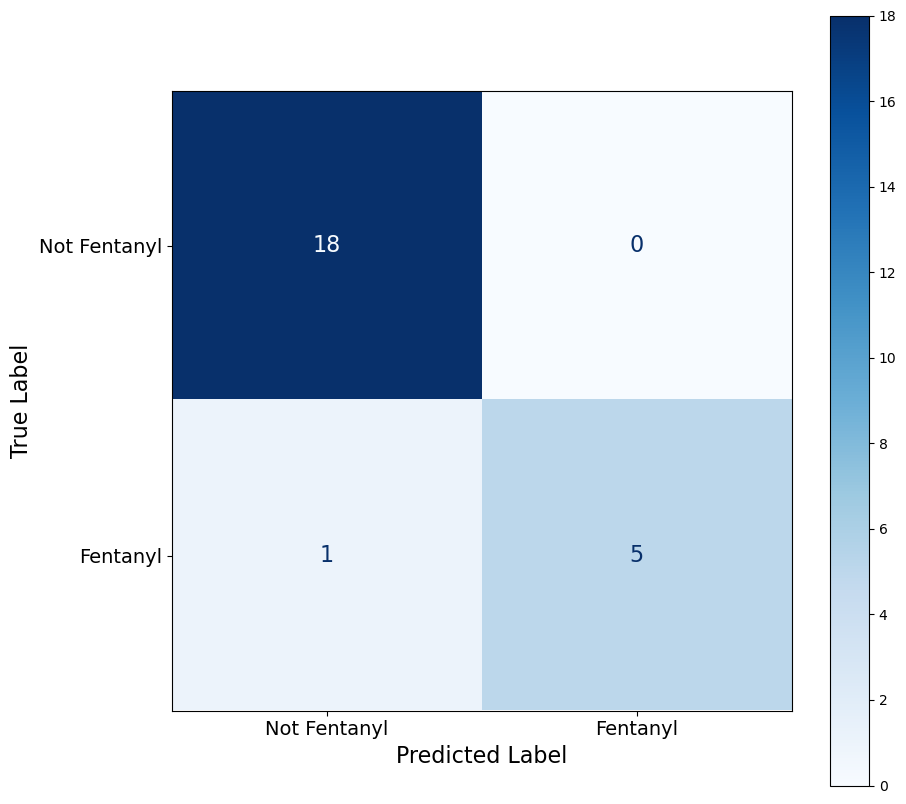

True Positives:  5
False Positives: 0
False Negatives: 1
True Negatives:  18

Precision: 1.00
Recall:    0.83
F1 Score:  0.91
Accuracy:  0.96
Matthews Correlation Coefficient (MCC): 0.89


In [11]:
# Plot confusion matrix
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    matthews_corrcoef
)

# Convert labels to binary, 1 = Fentanyl, 0 = Not Fentanyl
y_true_binary = [1 if label == 'Fentanyl' else 0 for label in y_test_labels]
y_pred_binary = [1 if label == 'Fentanyl' else 0 for label in y_pred]

# Confusion matrix
cm = confusion_matrix(y_true_binary, y_pred_binary)
tn, fp, fn, tp = cm.ravel()


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fentanyl', 'Fentanyl'])
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap='Blues', ax=ax)

for row in disp.text_:
    for text in row:
        text.set_fontsize(16)

plt.xlabel('Predicted Label', size=16)
plt.ylabel('True Label', size=16)
plt.xticks(size=14)
plt.yticks(size=14)

plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')

plt.show()

#_____________________________________________________________________________
# Metrics
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)
accuracy = accuracy_score(y_true_binary, y_pred_binary)
mcc = matthews_corrcoef(y_true_binary, y_pred_binary)

print(f"True Positives:  {tp}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Negatives:  {tn}\n")

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print(f"Accuracy:  {accuracy:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")


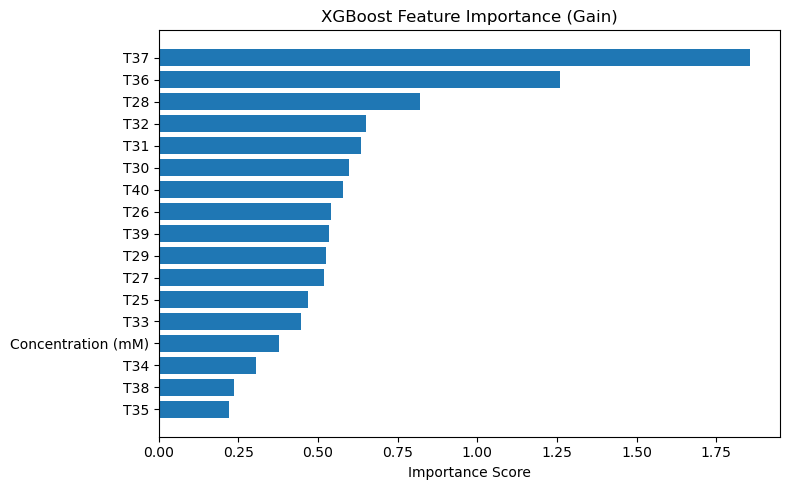

In [13]:
# Get feature names
features = ['Concentration (mM)','T25','T26','T27','T28','T29','T30','T31','T32','T33','T34','T35','T36','T37','T38','T39','T40']

# Get feature importances by gain
importances = best_model.get_booster().get_score(importance_type='gain')

# Convert feature map to ordered list
importance_scores = []
for i, feature in enumerate(features):
    key = f'f{i}'
    score = importances.get(key, 0)
    importance_scores.append((feature, score))

# Sort by importance
importance_scores = sorted(importance_scores, key=lambda x: x[1], reverse=True)

# Plot
feat_names, scores = zip(*importance_scores)
plt.figure(figsize=(8, 5))
plt.barh(feat_names, scores)
plt.gca().invert_yaxis()  # Highest on top
plt.title("XGBoost Feature Importance (Gain)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [14]:
# Identify the false negative samples

# Convert to pandas series
y_true_series = pd.Series(y_true_binary, index=test_data.index)
y_pred_series = pd.Series(y_pred_binary, index=test_data.index)

# Mask for false negatives
false_negative_mask = (y_true_series == 1) & (y_pred_series == 0)

# Extract the corresponding test samples
false_negative_samples = test_data.loc[false_negative_mask]

print("False negative samples:")
display(false_negative_samples)


False negative samples:


,Drug Name,Concentration (mM),T25,T26,T27,T28,T29,T30,T31,T32,T33,T34,T35,T36,T37,T38,T39,T40
0,Fentanyl,0,100.0,99.007175,125.699437,119.39881,108.22643,97.873849,84.98325,69.449107,51.880004,39.627803,31.405087,25.215447,21.021643,18.721185,16.87848,16.355607
